In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns



import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
data2 = pd.read_csv('result_data+500m.csv', encoding ='cp949', index_col=0)

In [ ]:
data2.head()

,주소,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,상권_코드_명,행정동_코드_명,행정동,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,타깃,within_500m_count
0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190,홍대입구,88.392637,홍대입구역,166.433007,18776599.0,경의선책거리,서교동,서교동,13872.0,0.228702,18776599,1,3.0
1,서울특별시 마포구 서교동 415,678,37.555071,126.923825,홍대입구,129.308001,서교푸르지오아파트,141.023502,18776599.0,경의선책거리,서교동,서교동,13872.0,0.435151,18776599,1,2.0
2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초4동,8611.0,0.274811,13047869,1,1.0
3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.191843,18318007.0,경수초등학교,성수2가1동,성수2가3동,3907.0,0.332030,11215576,1,2.0
4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초2동,9579.0,0.274811,13047869,1,1.0


In [ ]:
data2.reset_index(inplace=True, drop=True)
data2

,주소,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,상권_코드_명,행정동_코드_명,행정동,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,타깃,within_500m_count
0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190,홍대입구,88.392637,홍대입구역,166.433007,18776599.0,경의선책거리,서교동,서교동,13872.0,0.228702,18776599,1,3.0
1,서울특별시 마포구 서교동 415,678,37.555071,126.923825,홍대입구,129.308001,서교푸르지오아파트,141.023502,18776599.0,경의선책거리,서교동,서교동,13872.0,0.435151,18776599,1,2.0
2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초4동,8611.0,0.274811,13047869,1,1.0
3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.191843,18318007.0,경수초등학교,성수2가1동,성수2가3동,3907.0,0.332030,11215576,1,2.0
4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초2동,9579.0,0.274811,13047869,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,서울특별시 영등포구 문래동4가 46-1,11,37.514477,126.889889,신도림,594.214042,문래동국화아파트,196.478949,20448315.0,문래예술촌(문래창작촌),문래동,문래동,10598.0,0.141925,20448315,0,2.0
1665,서울특별시 영등포구 영등포동4가 53-3,11,37.517770,126.903680,영등포,328.913543,영등포소방서.타임스퀘어,56.165160,8341661.0,영등포시장역 4번,영등포동,영등포동,17571.0,0.455112,4204624,0,2.0
1666,서울특별시 영등포구 영등포동 647-4,11,37.522279,126.907857,영등포시장,226.178392,영등포시장,239.123735,4487649.0,영등포시장역 3번,영등포동,영등포본동,7012.0,0.152435,4487649,0,6.0
1667,서울특별시 도봉구 쌍문동 424-2,11,37.653470,127.027150,쌍문,871.581159,둘리뮤지엄.대우이안극동아파트,219.781477,15406821.0,쌍문초등학교,쌍문1동,쌍문1동,6240.0,0.414443,15406821,0,1.0


In [ ]:
data2 = data2.dropna()
data2.reset_index(inplace=True, drop=True)

In [ ]:
data2.columns

Index(['주소', '횟수', '위도', '경도', '가장 가까운 지하철역명', '가장 가까운 지하철역과의 거리(m)',
       '가장 가까운 버스정거장명', '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수', '상권_코드_명',
       '행정동_코드_명', '행정동', '인구수', '가장 가까운 상권과의 거리(km)', '가장 가까운 상권의 유동인구 수',
       '타깃', 'within_500m_count'],
      dtype='object')

In [ ]:
data2_selected = data2[['횟수', '가장 가까운 지하철역과의 거리(m)', '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수',
       '인구수', '가장 가까운 상권과의 거리(km)', '가장 가까운 상권의 유동인구 수','within_500m_count']] #연속형 변수만 사용합니다
data2_selected

,횟수,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,within_500m_count
0,762,88.392637,166.433007,18776599.0,13872.0,0.228702,18776599,3.0
1,678,129.308001,141.023502,18776599.0,13872.0,0.435151,18776599,2.0
2,377,396.739322,121.597606,13047869.0,8611.0,0.274811,13047869,1.0
3,355,470.146971,97.191843,18318007.0,3907.0,0.332030,11215576,2.0
4,329,396.739322,121.597606,13047869.0,9579.0,0.274811,13047869,1.0
...,...,...,...,...,...,...,...,...
1497,11,594.214042,196.478949,20448315.0,10598.0,0.141925,20448315,2.0
1498,11,328.913543,56.165160,8341661.0,17571.0,0.455112,4204624,2.0
1499,11,226.178392,239.123735,4487649.0,7012.0,0.152435,4487649,6.0
1500,11,871.581159,219.781477,15406821.0,6240.0,0.414443,15406821,1.0


In [ ]:
# scale
from sklearn.preprocessing import StandardScaler

data2_scaled = pd.DataFrame(StandardScaler().fit_transform(data2_selected), columns=data2_selected.columns, index = data2_selected.index)
data2_scaled

,횟수,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,within_500m_count
0,17.508900,-1.453103,0.527385,0.617277,1.146714,-0.420869,0.704505,0.568221
1,15.501475,-1.304548,0.155442,0.617277,1.146714,0.842428,0.704505,-0.152613
2,8.308202,-0.333557,-0.128914,-0.081838,-0.170904,-0.138723,-0.000590,-0.873448
3,7.782448,-0.067028,-0.486165,0.561312,-1.349022,0.211412,-0.226110,-0.152613
4,7.161102,-0.333557,-0.128914,-0.081838,0.071532,-0.138723,-0.000590,-0.873448
...,...,...,...,...,...,...,...,...
1497,-0.438436,0.383435,0.967197,0.821288,0.326740,-0.951871,0.910261,-0.152613
1498,-0.438436,-0.579819,-1.086712,-0.656168,2.073129,0.964570,-1.089022,-0.152613
1499,-0.438436,-0.952830,1.591430,-1.126499,-0.571374,-0.887562,-1.054187,2.730724
1500,-0.438436,1.390501,1.308298,0.206041,-0.764721,0.715711,0.289751,-0.873448


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 960.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=39dc2219810737e631a0c6cd95764d706d7f24fff4fb9a7d4efa0305bf90c2f1
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(data2_scaled)
data2_pca = pd.DataFrame(data = pca.transform(data2_scaled), columns=['pc1', 'pc2', 'pc3'])
data2_pca.head()

,pc1,pc2,pc3
0,2.380566,3.249017,4.354709
1,1.546201,4.060659,4.170790
2,0.017125,1.777923,2.560534
3,0.097229,1.307547,3.378361
4,0.015177,1.636703,2.110082


In [ ]:
pca2 = PCA(n_components = 5)
pca2.fit(data2_scaled)
data2_pca2 = pd.DataFrame(data = pca2.transform(data2_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
data2_pca2.head()

,pc1,pc2,pc3,pc4,pc5
0,2.380566,3.249017,4.354709,9.950893,13.126661
1,1.546201,4.060659,4.170790,8.727285,11.304806
2,0.017125,1.777923,2.560534,4.387830,6.320231
3,0.097229,1.307547,3.378361,3.410161,6.175504
4,0.015177,1.636703,2.110082,3.894144,5.368217


In [ ]:
pca2.explained_variance_ratio_

array([0.28826251, 0.16952151, 0.14187853, 0.13404581, 0.11735769])

In [ ]:
pca_all = PCA(n_components = 8)
pca_all.fit(data2_scaled)
pca_all.explained_variance_ratio_

array([0.28826251, 0.16952151, 0.14187853, 0.13404581, 0.11735769,
       0.09271643, 0.04892106, 0.00729646])

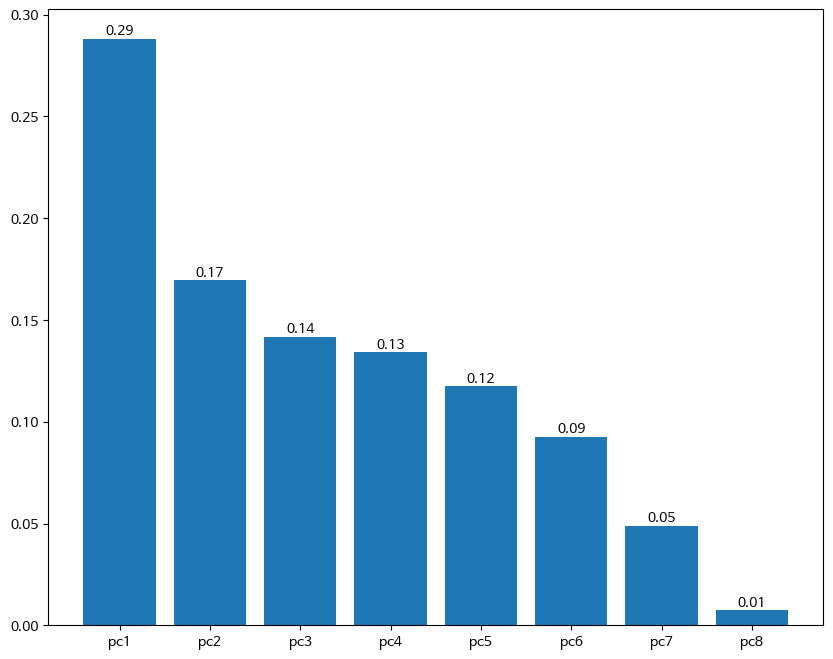

In [ ]:
vr = pca_all.explained_variance_ratio_
fig = plt.figure(figsize=(10, 8))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'], pca_all.explained_variance_ratio_)
for i, v in enumerate(vr):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
sum(pca2.explained_variance_ratio_) #설명된 분산 비율이 80퍼센트 이상이 되기 위해 5개를 골랐습니다.

0.8510660483383483

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

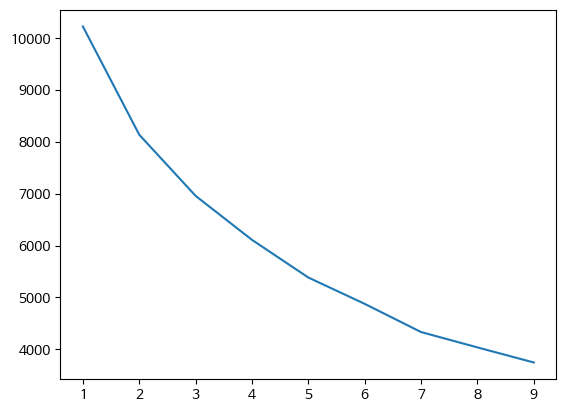

In [ ]:
from sklearn.cluster import KMeans

x = []   # k 가 몇개인지
y = []   # 응집도가 몇인지
# K값을 정해주어요.

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2_pca2)

    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2_pca2)
data2_pca2['labels'] = kmeans.predict(data2_pca2)

data2_pca2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pc1,pc2,pc3,pc4,pc5,labels
0,2.380566,3.249017,4.354709,9.950893,13.126661,2
1,1.546201,4.060659,4.170790,8.727285,11.304806,2
2,0.017125,1.777923,2.560534,4.387830,6.320231,0
3,0.097229,1.307547,3.378361,3.410161,6.175504,0
4,0.015177,1.636703,2.110082,3.894144,5.368217,0
...,...,...,...,...,...,...
1497,1.360246,0.112967,-0.876741,-0.500853,0.044134,2
1498,-1.015197,0.524943,-0.485605,0.954225,-1.349193,1
1499,0.212313,-2.843837,-1.356680,0.666937,0.289141,0
1500,-0.459692,0.996814,-0.753206,-1.559555,0.662900,1


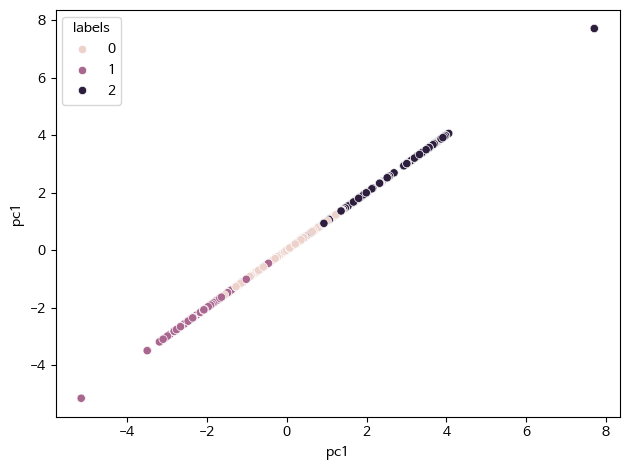

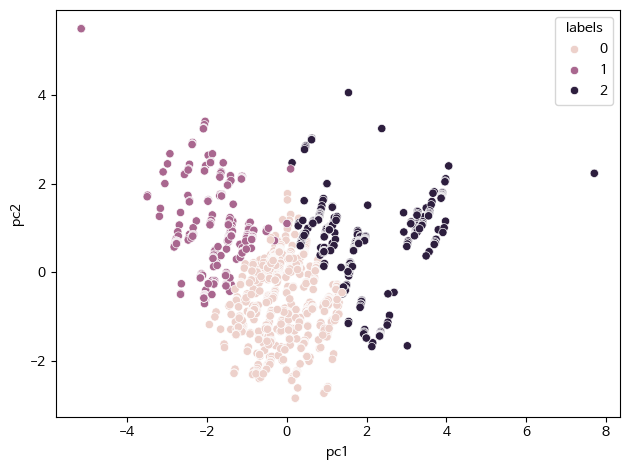

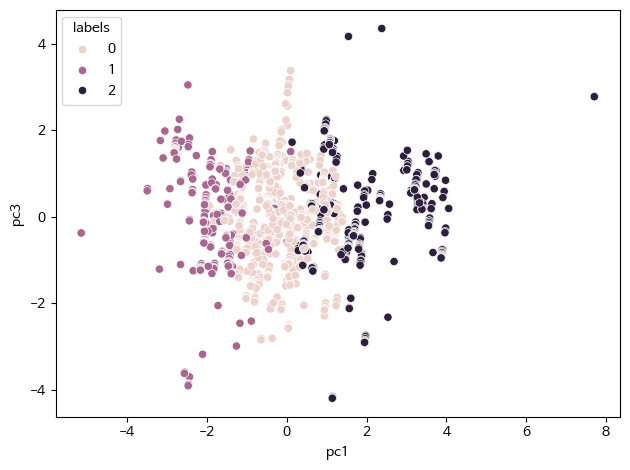

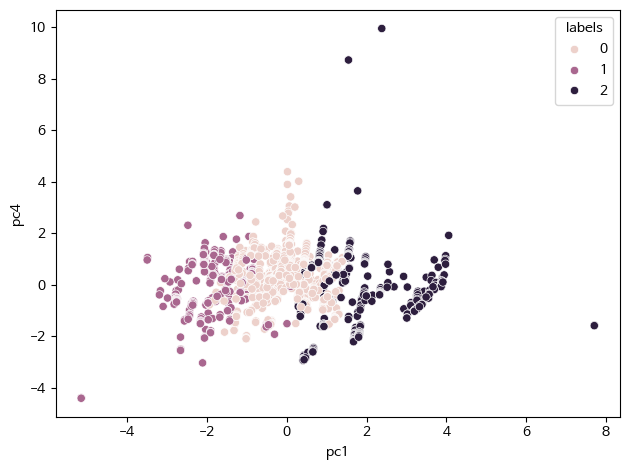

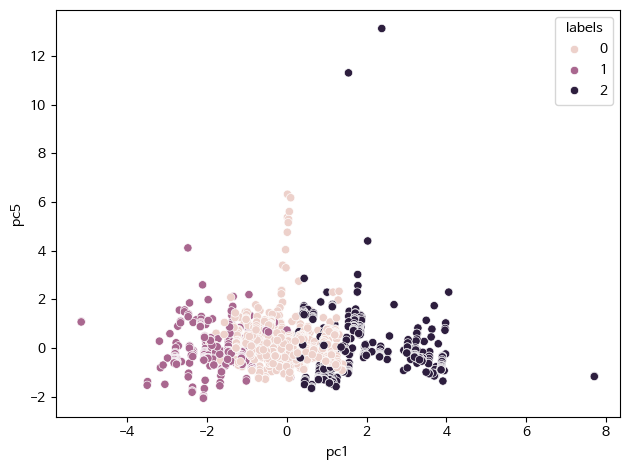

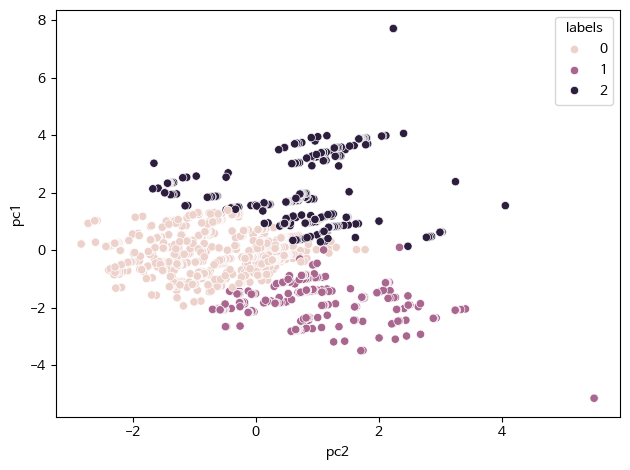

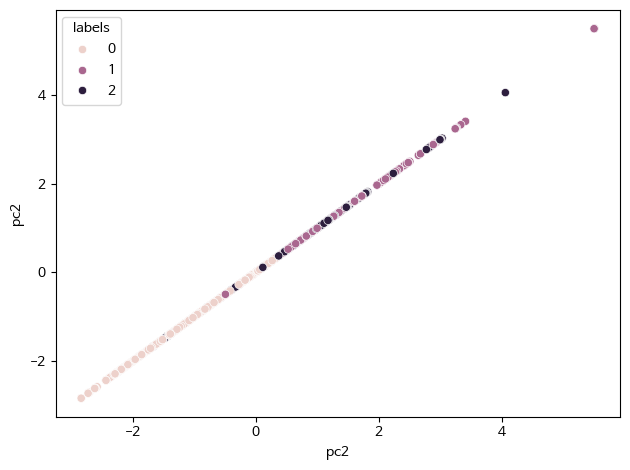

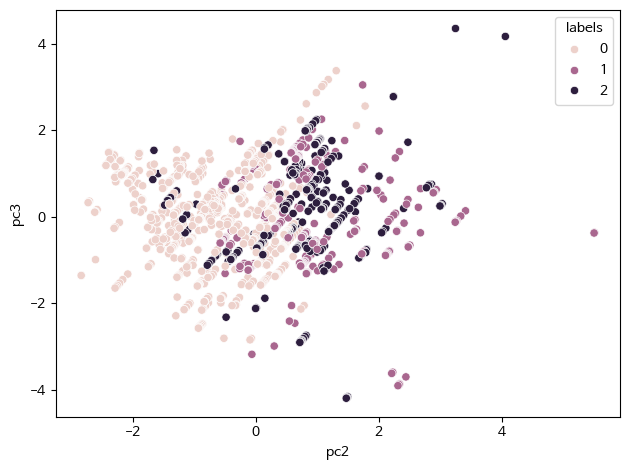

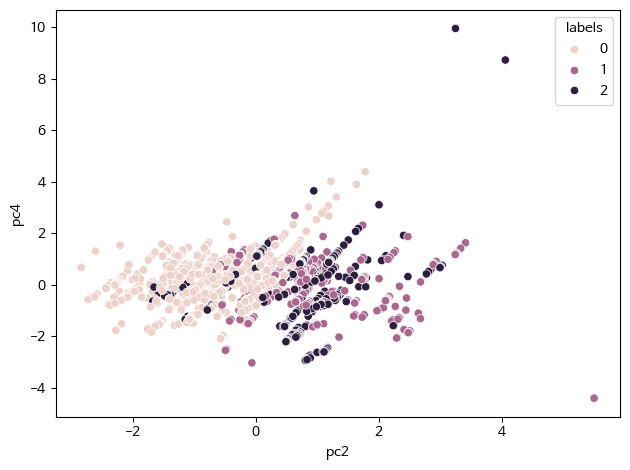

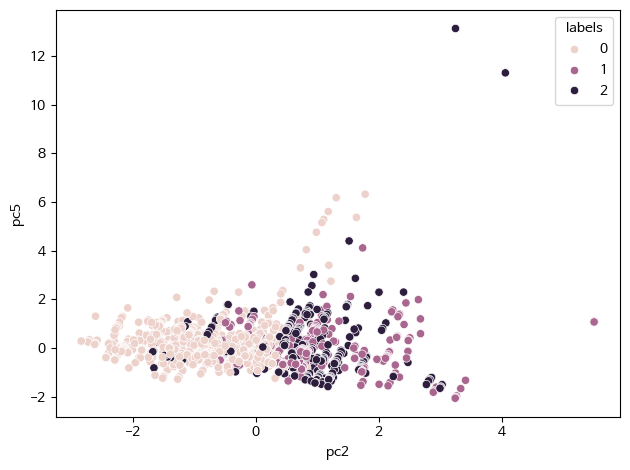

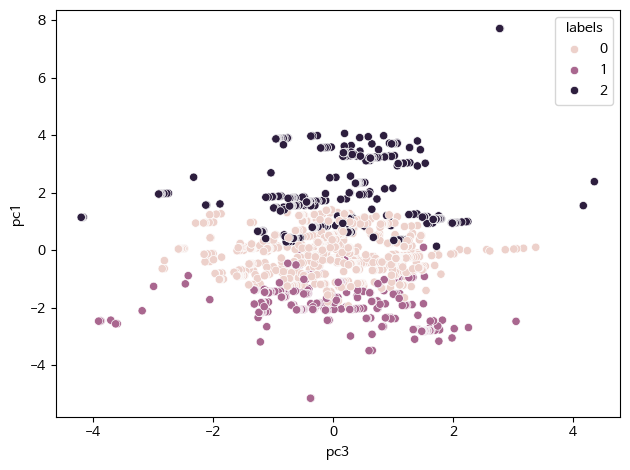

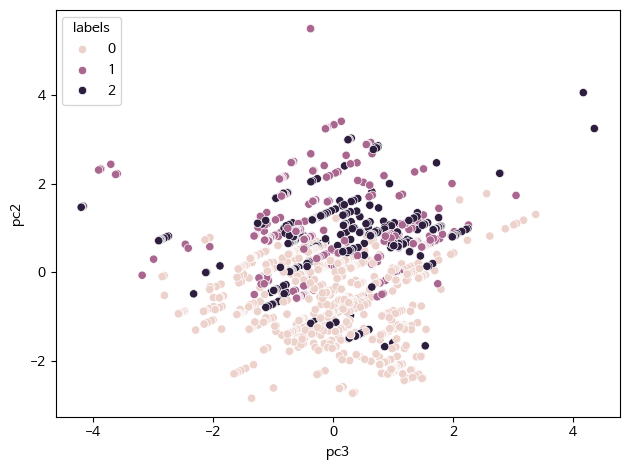

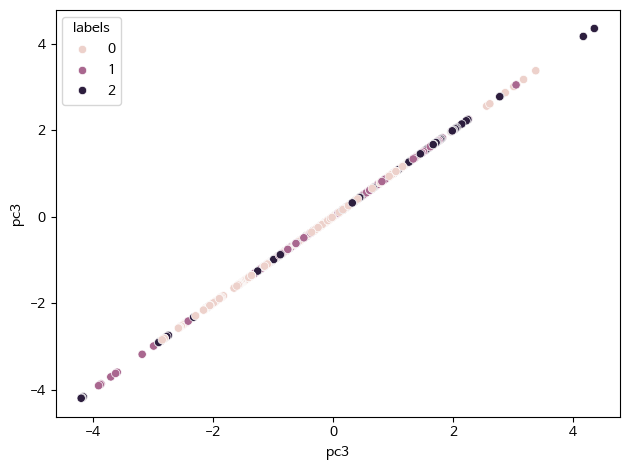

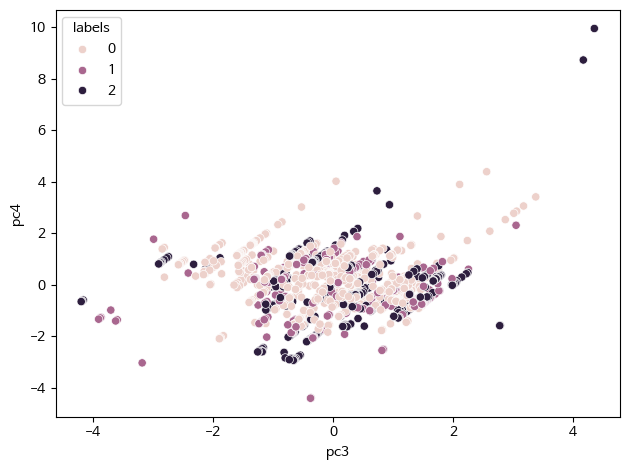

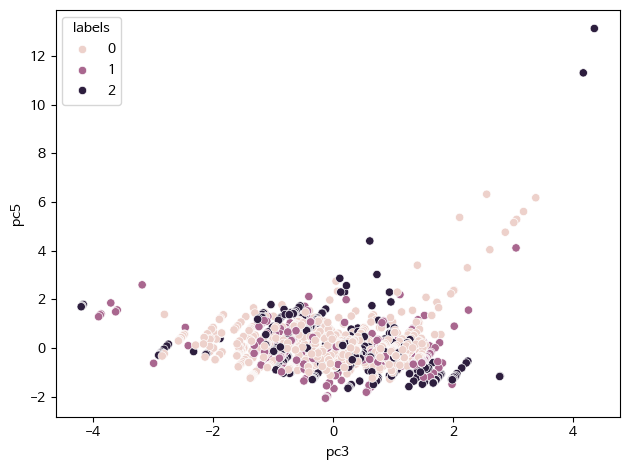

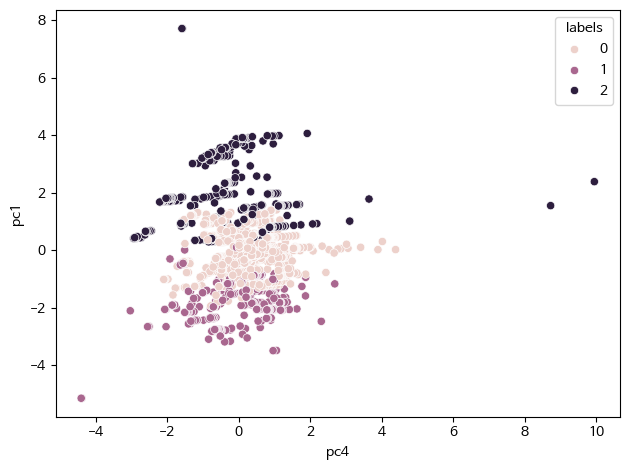

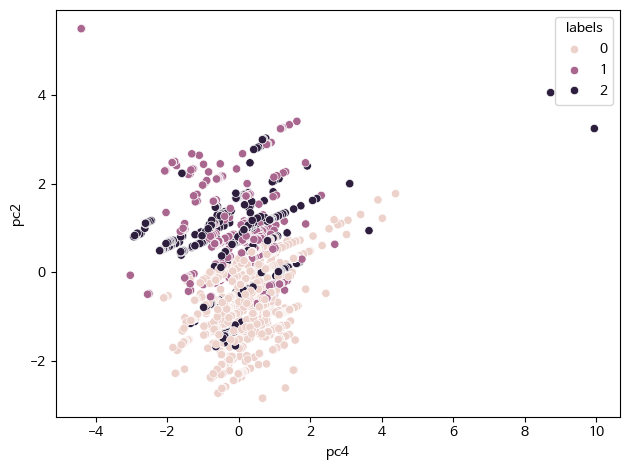

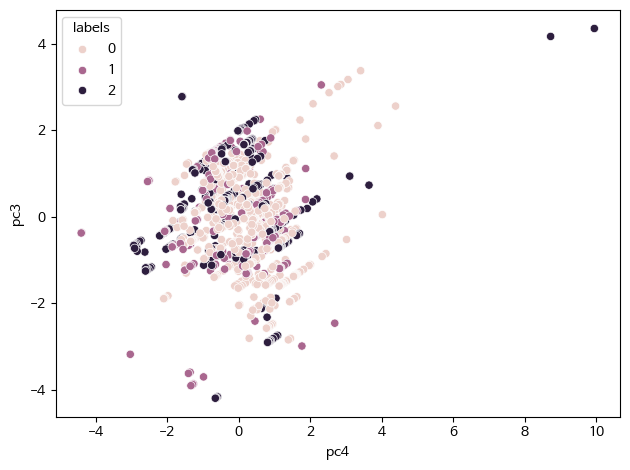

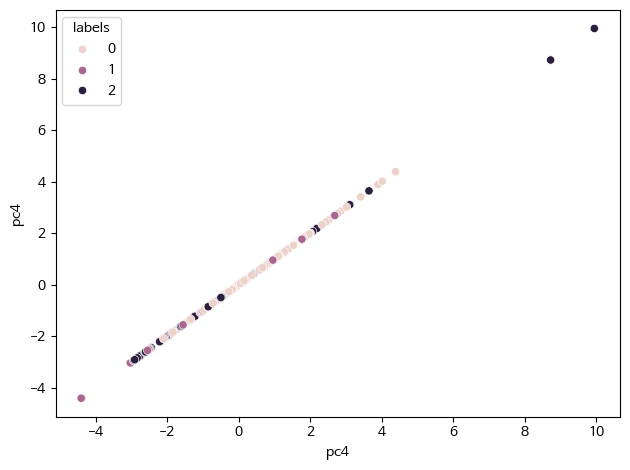

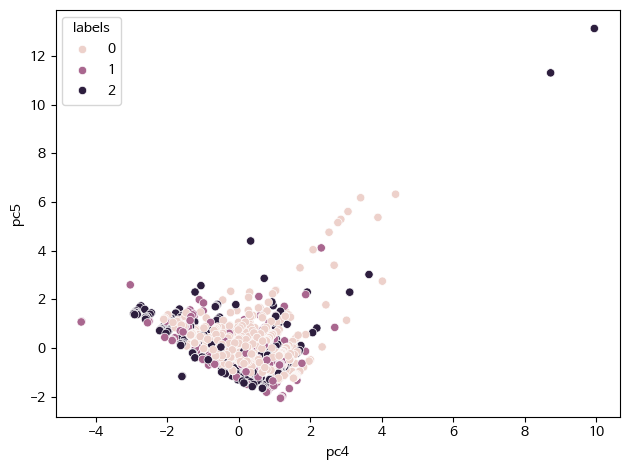

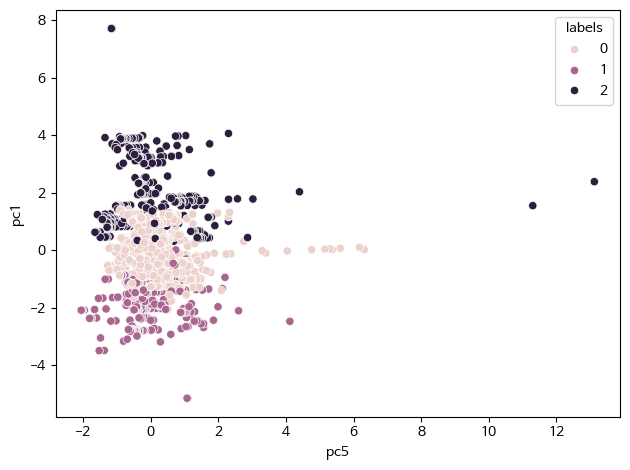

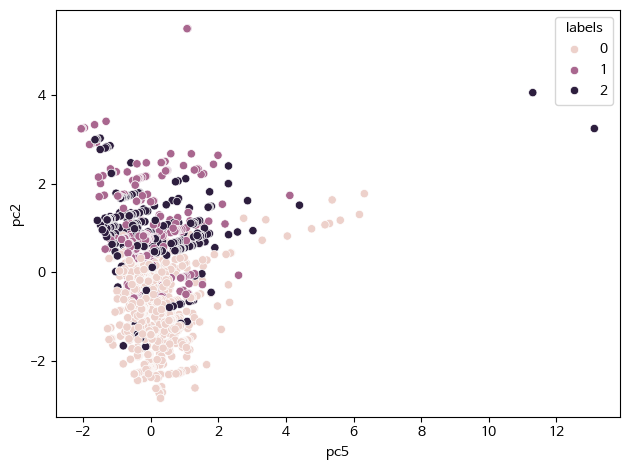

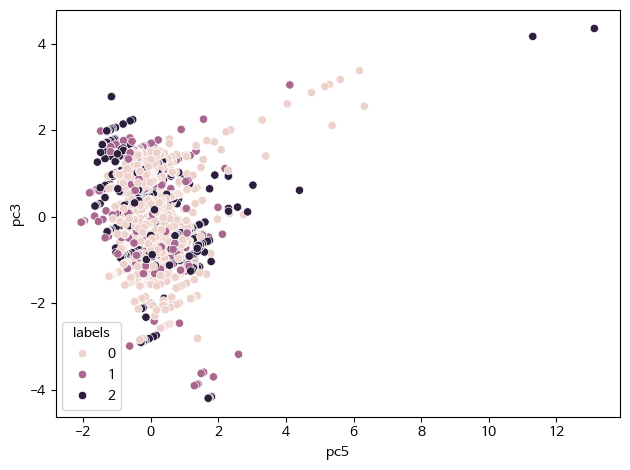

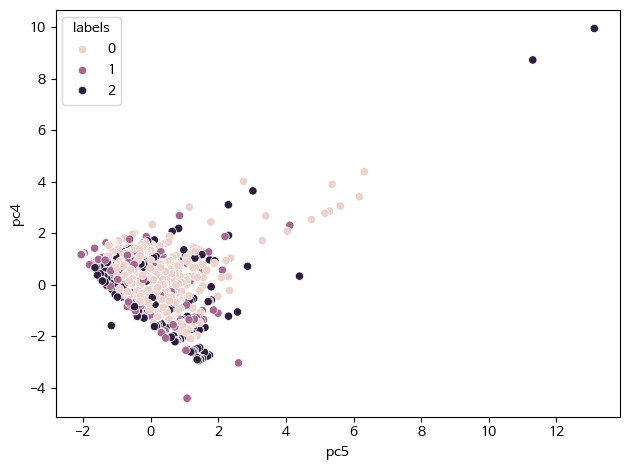

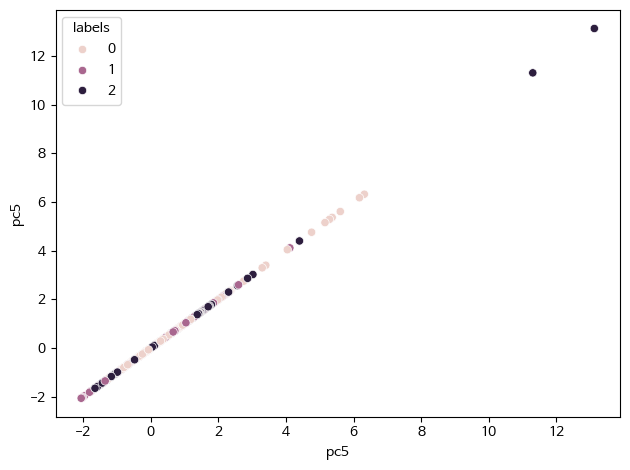

In [ ]:
for i in range(1,6):
    for j in range(1,6):
        sns.scatterplot(x='pc{}'.format(i), y='pc{}'.format(j), hue='labels', data=data2_pca2)

        plt.tight_layout()
        plt.show()

<Axes: xlabel='pc1', ylabel='pc2'>

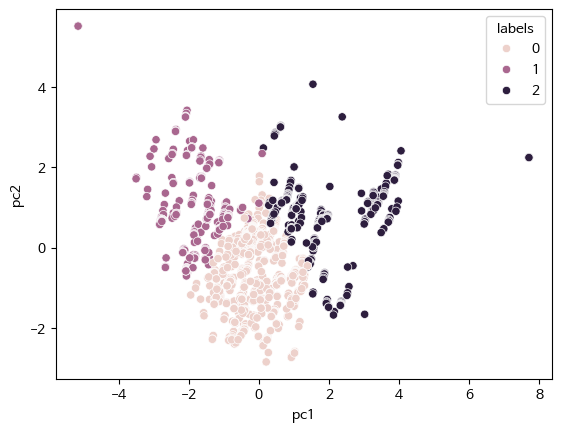

In [ ]:
#이그림이 젤 이쁨!! 이거 쓰셈
sns.scatterplot(x='pc1', y='pc2', hue='labels', data=data2_pca2)

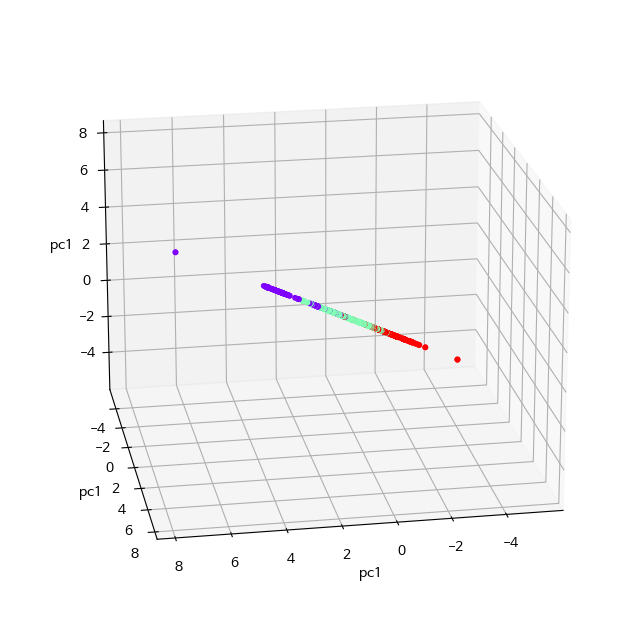

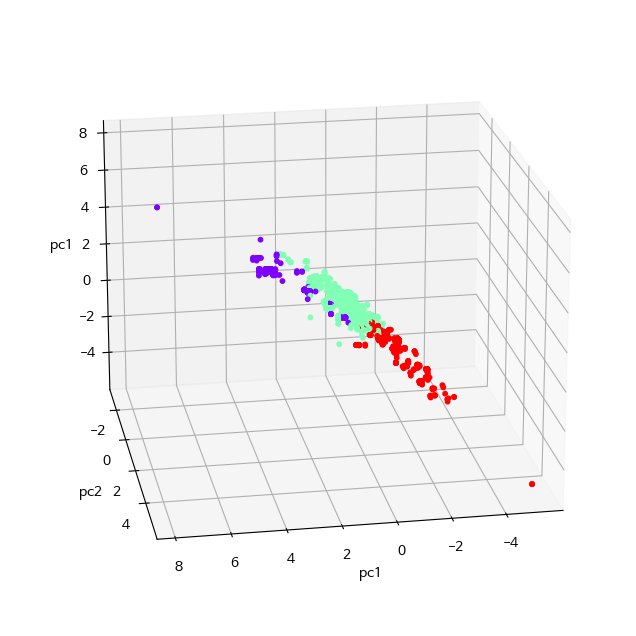

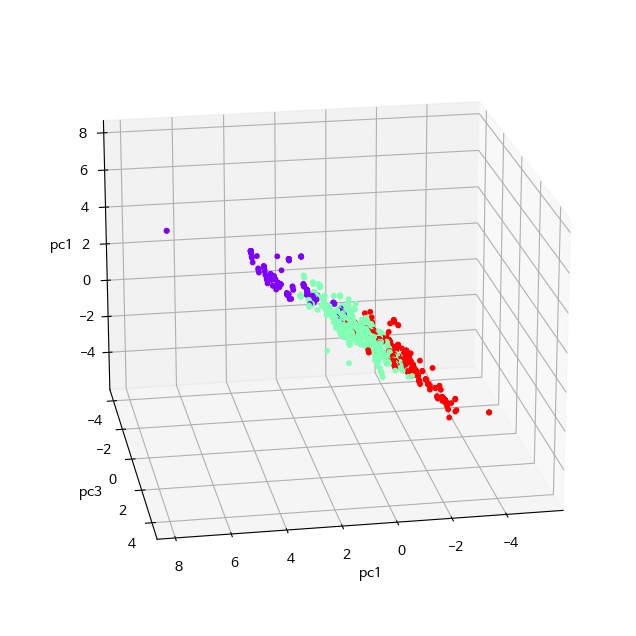

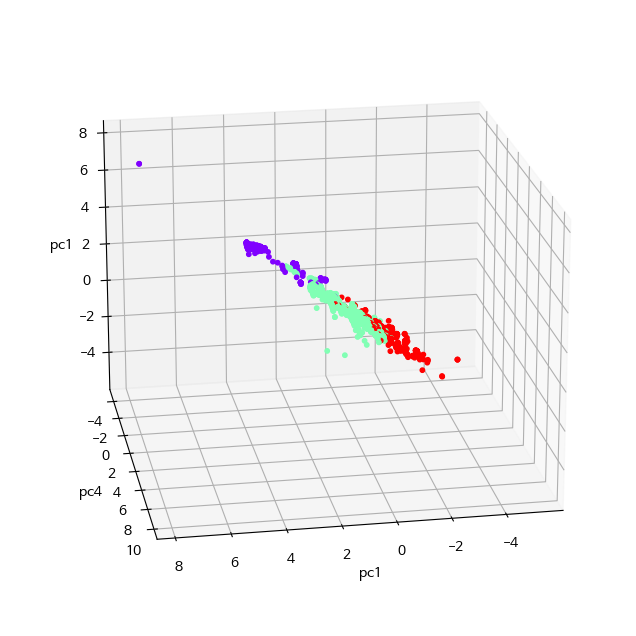

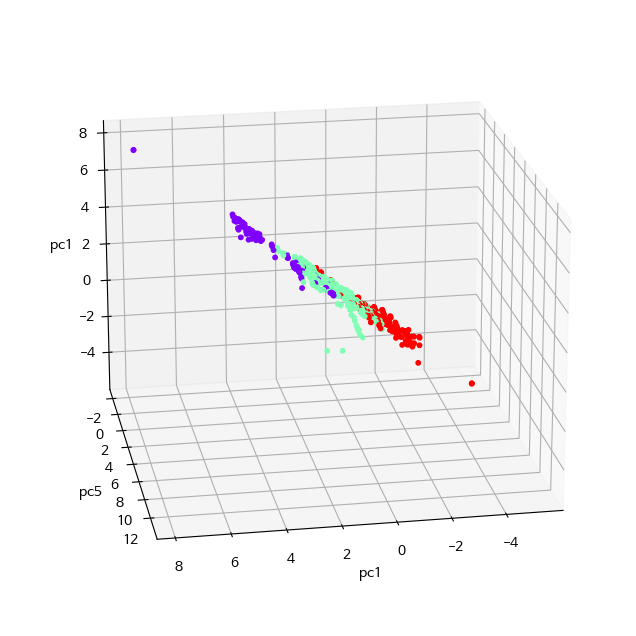

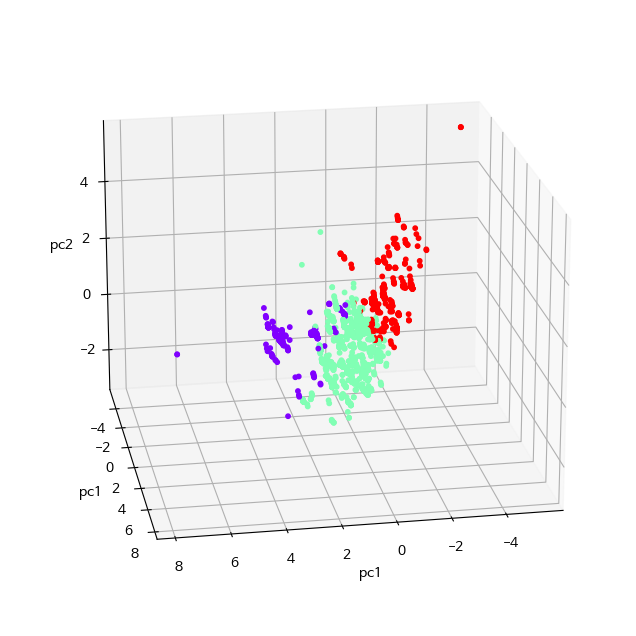

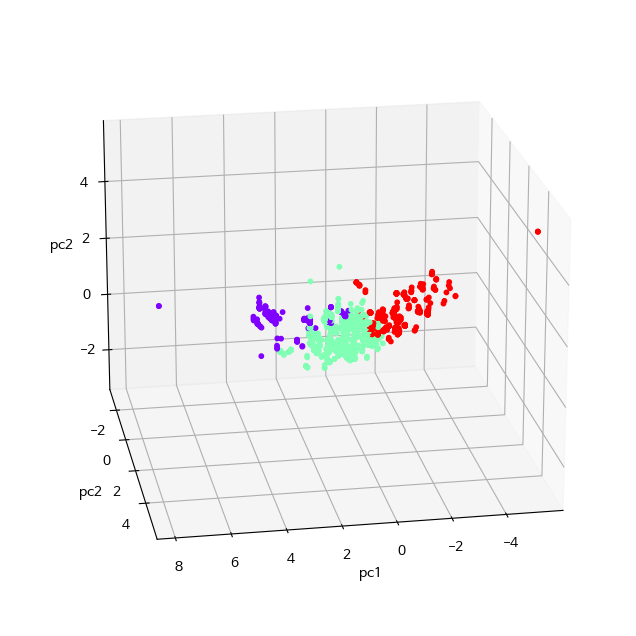

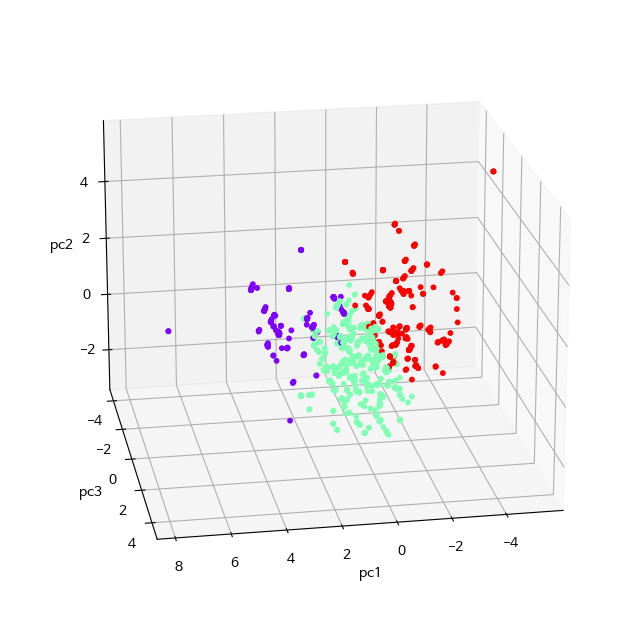

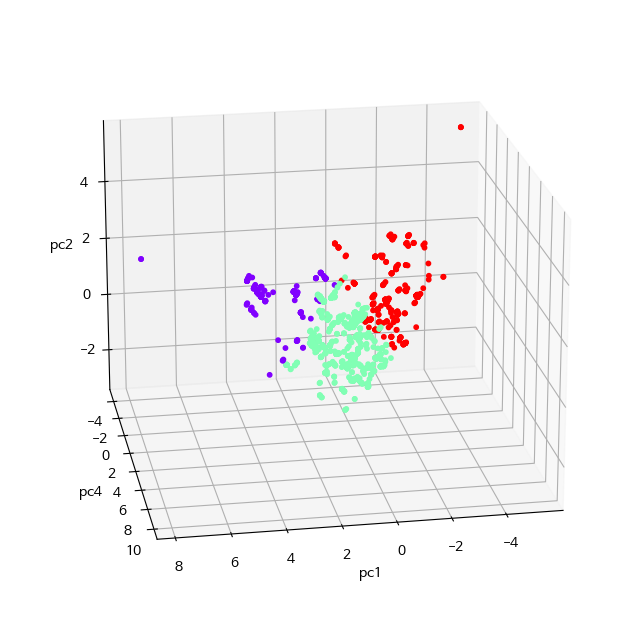

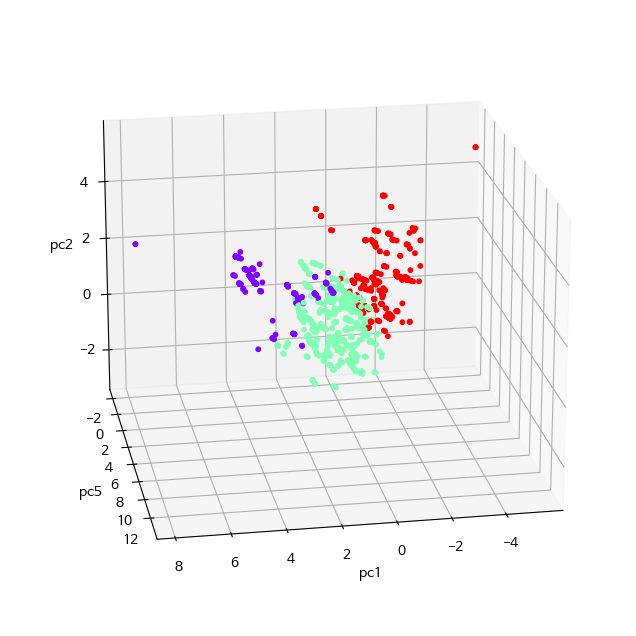

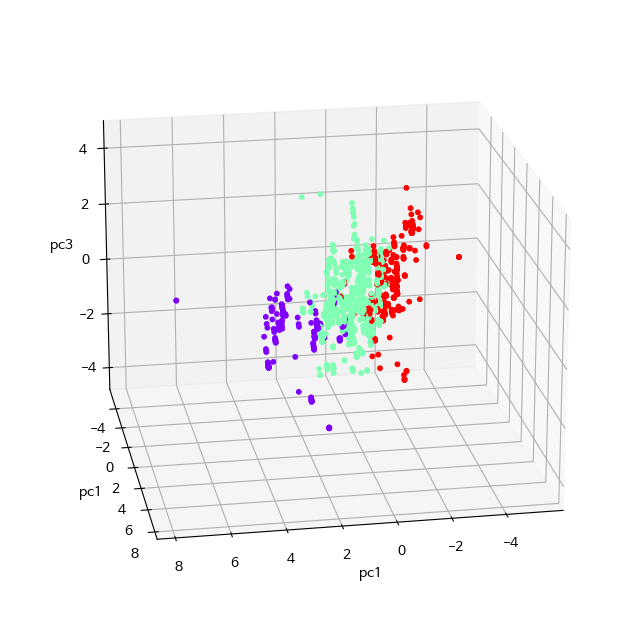

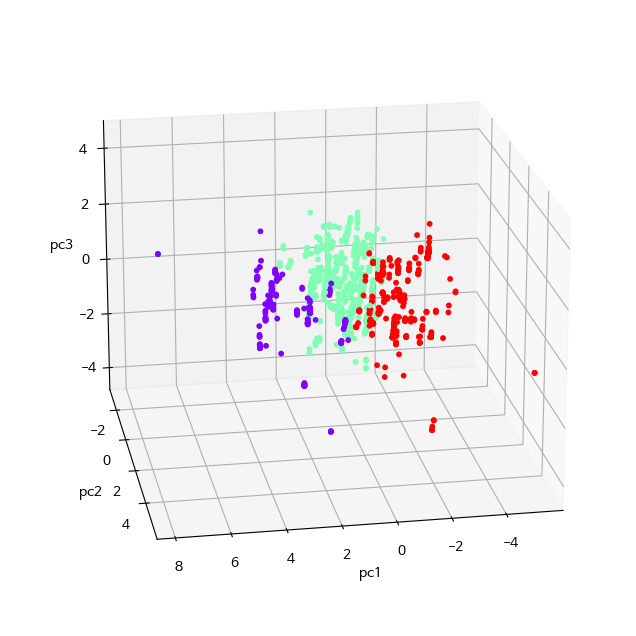

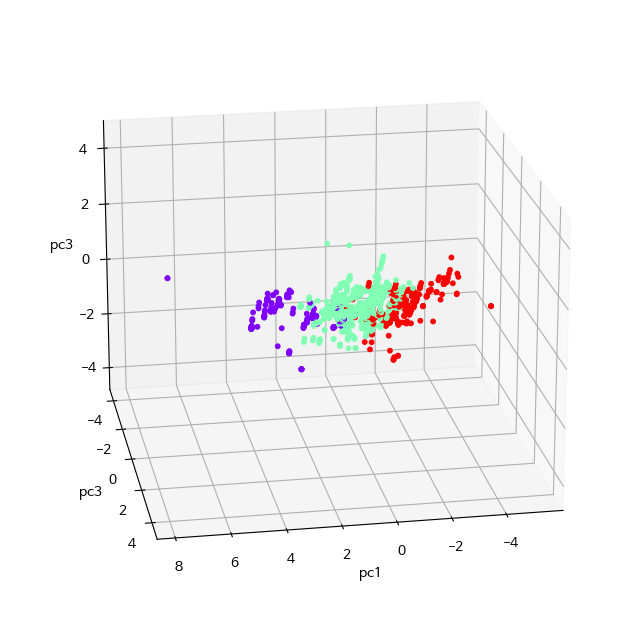

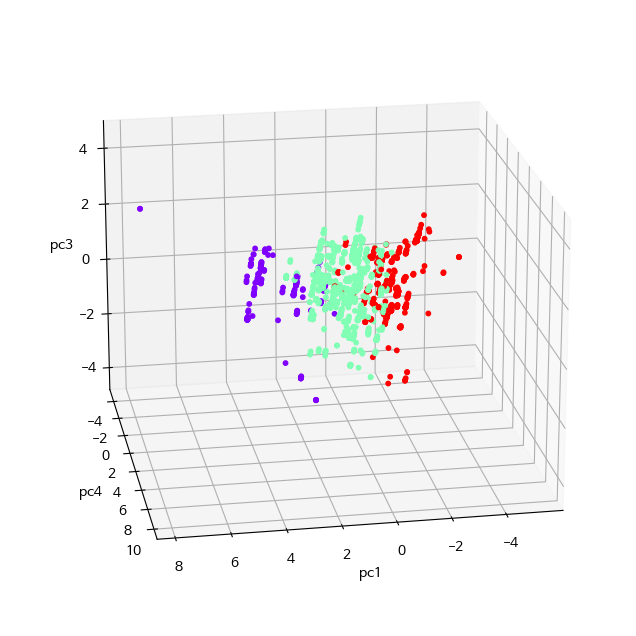

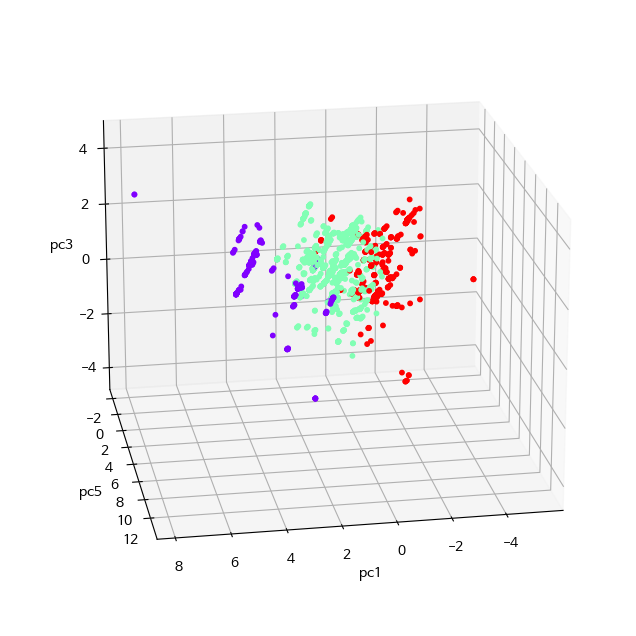

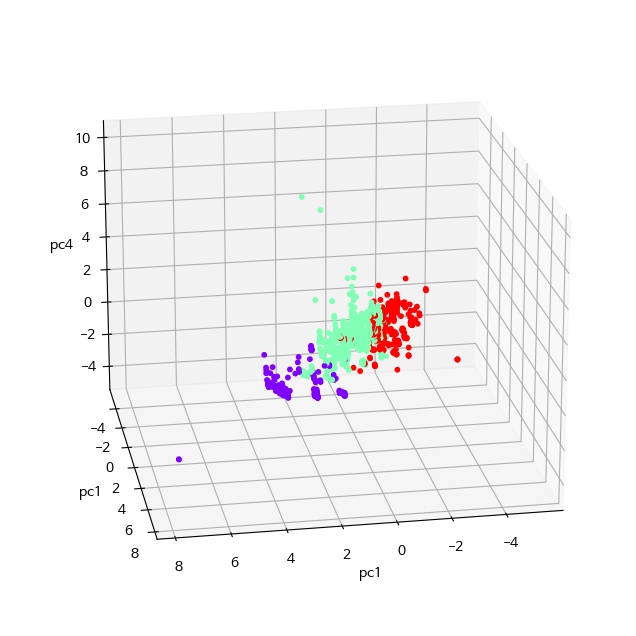

KeyboardInterrupt: 

In [ ]:
X = data2_pca2

for i in range(5):
    for k in range(5):
        for j in range(5):
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(  X.iloc[:,i]
                    , X.iloc[:,j]
                    , X.iloc[:,k]
                    , c = X.labels
                    , s = 10
                    , cmap = "rainbow"
                    , alpha = 1
                    )
            ax.view_init(20, 80)
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.show()


# centroid scatterplot
# ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

In [ ]:
result_df = data2_pca2.copy()

In [ ]:
result_df

,pc1,pc2,pc3,pc4,pc5,labels
0,2.380566,3.249017,4.354709,9.950893,13.126661,2
1,1.546201,4.060659,4.170790,8.727285,11.304806,2
2,0.017125,1.777923,2.560534,4.387830,6.320231,0
3,0.097229,1.307547,3.378361,3.410161,6.175504,0
4,0.015177,1.636703,2.110082,3.894144,5.368217,0
...,...,...,...,...,...,...
1497,1.360246,0.112967,-0.876741,-0.500853,0.044134,2
1498,-1.015197,0.524943,-0.485605,0.954225,-1.349193,1
1499,0.212313,-2.843837,-1.356680,0.666937,0.289141,0
1500,-0.459692,0.996814,-0.753206,-1.559555,0.662900,1


In [ ]:
cluster_0 = result_df[result_df['labels'] == 0]
cluster_1 = result_df[result_df['labels'] == 1]
cluster_2 = result_df[result_df['labels'] == 2]
index_0 = list(cluster_0.index)
index_1 = list(cluster_1.index)
index_2 = list(cluster_2.index)

In [ ]:
data2_labeled = data2.copy()
data2_labeled.reset_index(inplace=True, drop=True)
data2_labeled['labels'] = result_df['labels']
data2_labeled['labels'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1497    False
1498    False
1499    False
1500    False
1501    False
Name: labels, Length: 1502, dtype: bool

In [ ]:
df_0 = data2_labeled[data2_labeled['labels'] == 0]
df_1 = data2_labeled[data2_labeled['labels'] == 1]
df_2 = data2_labeled[data2_labeled['labels'] == 2]

# 시각화

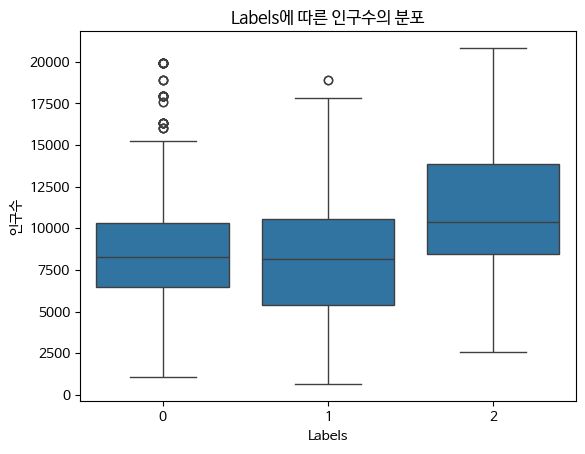

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='인구수', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('인구수')
plt.title('Labels에 따른 인구수의 분포')
plt.show()

In [ ]:
data2_labeled.columns

Index(['주소', '횟수', '위도', '경도', '가장 가까운 지하철역명', '가장 가까운 지하철역과의 거리(m)',
       '가장 가까운 버스정거장명', '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수', '상권_코드_명',
       '행정동_코드_명', '행정동', '인구수', '가장 가까운 상권과의 거리(km)', '가장 가까운 상권의 유동인구 수',
       '타깃', 'within_500m_count', 'labels'],
      dtype='object')

In [ ]:
data2_labeled

,주소,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,상권_코드_명,행정동_코드_명,행정동,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,타깃,within_500m_count,labels
0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190,홍대입구,88.392637,홍대입구역,166.433007,18776599.0,경의선책거리,서교동,서교동,13872.0,0.228702,18776599,1,3.0,2
1,서울특별시 마포구 서교동 415,678,37.555071,126.923825,홍대입구,129.308001,서교푸르지오아파트,141.023502,18776599.0,경의선책거리,서교동,서교동,13872.0,0.435151,18776599,1,2.0,2
2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초4동,8611.0,0.274811,13047869,1,1.0,0
3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.191843,18318007.0,경수초등학교,성수2가1동,성수2가3동,3907.0,0.332030,11215576,1,2.0,0
4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초2동,9579.0,0.274811,13047869,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,서울특별시 영등포구 문래동4가 46-1,11,37.514477,126.889889,신도림,594.214042,문래동국화아파트,196.478949,20448315.0,문래예술촌(문래창작촌),문래동,문래동,10598.0,0.141925,20448315,0,2.0,2
1498,서울특별시 영등포구 영등포동4가 53-3,11,37.517770,126.903680,영등포,328.913543,영등포소방서.타임스퀘어,56.165160,8341661.0,영등포시장역 4번,영등포동,영등포동,17571.0,0.455112,4204624,0,2.0,1
1499,서울특별시 영등포구 영등포동 647-4,11,37.522279,126.907857,영등포시장,226.178392,영등포시장,239.123735,4487649.0,영등포시장역 3번,영등포동,영등포본동,7012.0,0.152435,4487649,0,6.0,0
1500,서울특별시 도봉구 쌍문동 424-2,11,37.653470,127.027150,쌍문,871.581159,둘리뮤지엄.대우이안극동아파트,219.781477,15406821.0,쌍문초등학교,쌍문1동,쌍문1동,6240.0,0.414443,15406821,0,1.0,1


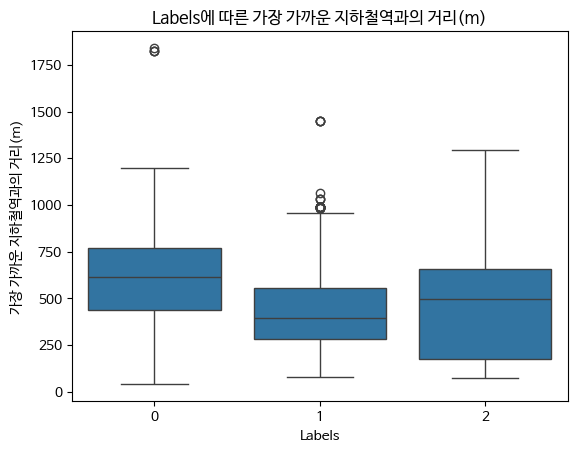

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='가장 가까운 지하철역과의 거리(m)', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('가장 가까운 지하철역과의 거리(m)')
plt.title('Labels에 따른 가장 가까운 지하철역과의 거리(m)')
plt.show()

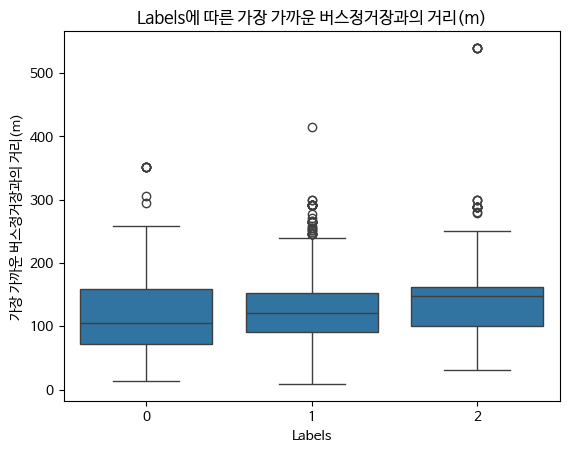

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='가장 가까운 버스정거장과의 거리(m)', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('가장 가까운 버스정거장과의 거리(m)')
plt.title('Labels에 따른 가장 가까운 버스정거장과의 거리(m)')
plt.show()

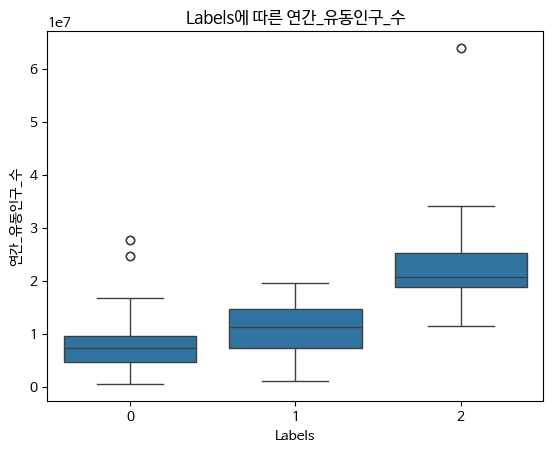

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='연간_유동인구_수', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('연간_유동인구_수')
plt.title('Labels에 따른 연간_유동인구_수')
plt.show()

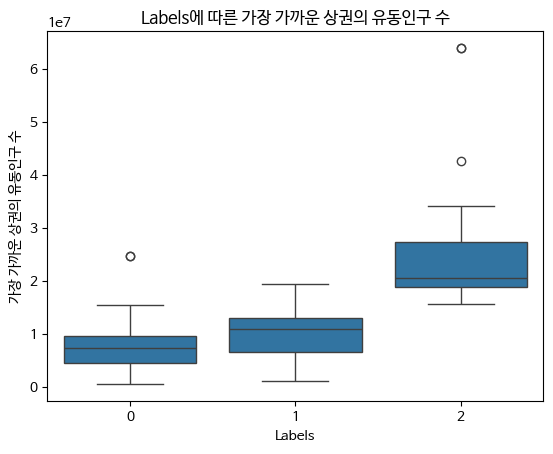

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='가장 가까운 상권의 유동인구 수', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('가장 가까운 상권의 유동인구 수')
plt.title('Labels에 따른 가장 가까운 상권의 유동인구 수')
plt.show()

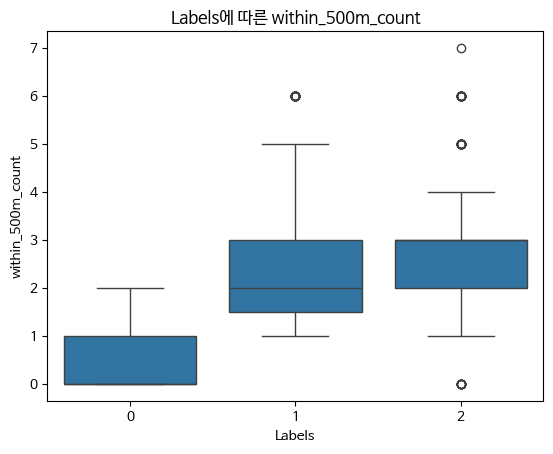

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='within_500m_count', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('within_500m_count')
plt.title('Labels에 따른 within_500m_count')
plt.show()

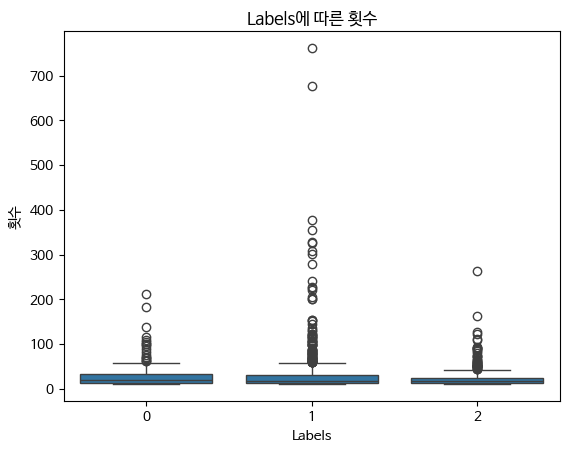

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='횟수', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('횟수')
plt.title('Labels에 따른 횟수')
plt.show()

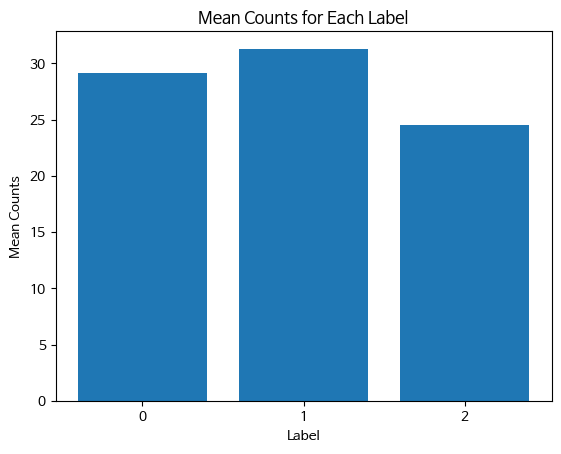

In [ ]:
mean_counts = data2_labeled.groupby('labels')['횟수'].mean()

# 평균값 그래프 그리기
plt.bar(mean_counts.index, mean_counts.values)
plt.xlabel('Label')
plt.ylabel('Mean Counts')
plt.title('Mean Counts for Each Label')
plt.xticks(mean_counts.index)  # x축 눈금 레이블 설정
plt.show()

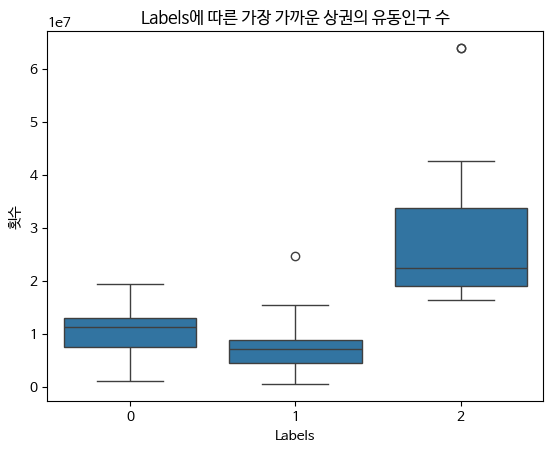

In [ ]:
# 'labels' 열이 0, 1, 2인 데이터 추출
data_to_plot = data2_labeled[data2_labeled['labels'].isin([0, 1, 2])]

# boxplot 그리기
sns.boxplot(x='labels', y='가장 가까운 상권의 유동인구 수', data=data_to_plot)
plt.xlabel('Labels')
plt.ylabel('횟수')
plt.title('Labels에 따른 가장 가까운 상권의 유동인구 수')
plt.show()